In [74]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

%matplotlib inline

sns.set()
# ethusdt
# btcusdt
# bchusdt
# bsvusdt
# ltcusdt


In [300]:
# Chiedere i dati una volta sola

def getData(symbol, period):
    url = 'https://api.huobi.pro/market/history/kline?symbol='+symbol+'&period='+period+'&size=1440'
    response = requests.get(url)
    data = response.json()['data']
    return data

def compute(data, first, last, symbol):
    delta = [(x['close'] - x['open'])/x['open'] * 100 for x in data[0:first+1]]

    nDelta = np.array(delta)

    mu, std = norm.fit(nDelta)

    fig, ax1 = plt.subplots()
    ax1.grid(False)
    ax2 = ax1.twinx()
    ax2.grid(False)

    ax1.hist(nDelta, color='#d7d7d7', bins=30)


    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(-.5, .5)
    p = norm.pdf(x, mu, std)
    ax2.plot(x, p, 'k', linewidth=2, c='#1E35E6')
    title = symbol.upper() + " : MEAN = %.3f,  DEV = %.3f" % (mu, std)
    plt.title(title)

    plt.vlines(0, 0, 10, colors='#3c3c3c')
    plt.vlines(mu, 0, norm.pdf(mu, mu, std), colors='#d90000')
    plt.vlines(3*std, 0, norm.pdf(mu, mu, std), colors='#d90000')
    
    plt.fill_between(np.linspace(mu, 3*std),norm.pdf(np.linspace(mu, 3*std), mu, std), alpha=0.5)
    
    plt.show()
    
    print 'open: ', data[first]['open'], 'close: ', data[last]['close'], 'Delta: ', data[last]['close'] - data[first]['open'] 
    print '1 hour + prob => ', (norm.cdf(3*std, mu, std) - norm.cdf(0, mu, std)) * 100, '%'
    print '1 hour k % => ', mu * 60

def checkNormal(symbol, period, size):
    data = getData(symbol, period);
    first = int(size) - 1;
    last = 0;
    compute(data, first, last, symbol)

def checkHalfHour(symbol):
    return checkNormal(symbol, '1min', '30')
def checkHour(symbol):
    return checkNormal(symbol, '1min', '60')
def check2Hour(symbol):
    return checkNormal(symbol, '1min', '120')
def check4Hour(symbol):
    return checkNormal(symbol, '1min', '240')
def check8Hour(symbol):
    return checkNormal(symbol, '1min', '480')
def check24Hour(symbol):
    return checkNormal(symbol, '1min', '1440')

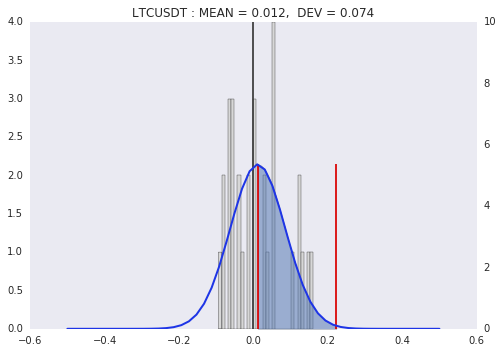

open:  74.36 close:  74.5 Delta:  0.14
1 hour + prob =>  56.0164742971 %
1 hour k % =>  0.701337111052


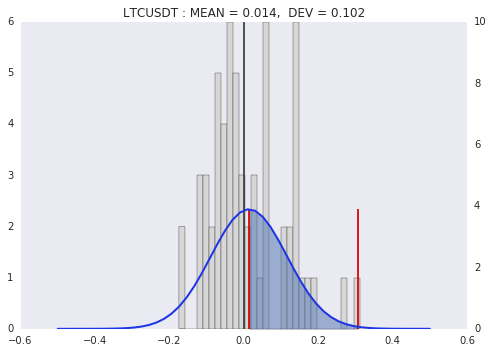

open:  74.02 close:  74.5 Delta:  0.48
1 hour + prob =>  55.216329466 %
1 hour k % =>  0.838094277831


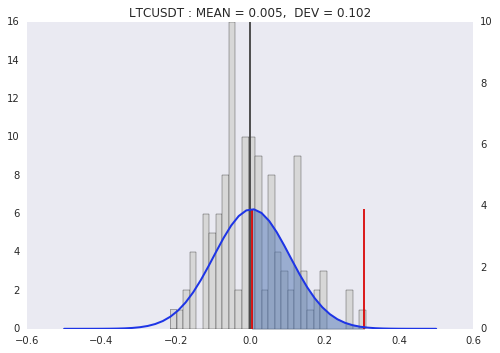

open:  74.21 close:  74.5 Delta:  0.29
1 hour + prob =>  51.6115690236 %
1 hour k % =>  0.272095082936


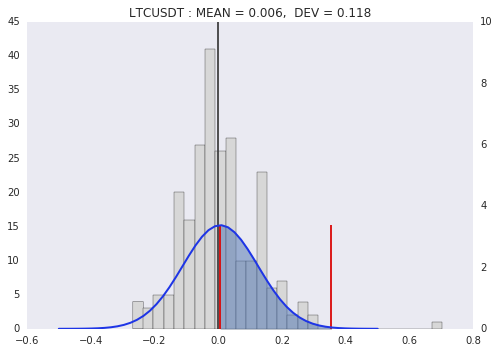

open:  73.12 close:  74.48 Delta:  1.36
1 hour + prob =>  52.0274952471 %
1 hour k % =>  0.389143106416


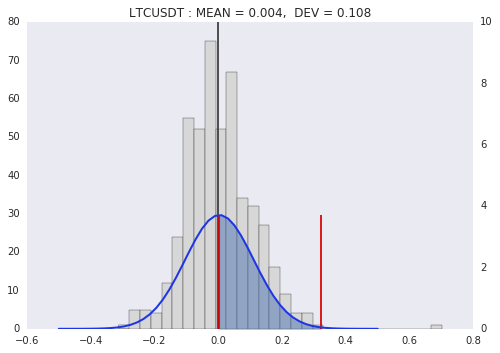

open:  72.82 close:  74.51 Delta:  1.69
1 hour + prob =>  51.1772169519 %
1 hour k % =>  0.214839160012


In [302]:
symbols = ['btcusdt', 'bchusdt', 'bsvusdt', 'ltcusdt', 'ethusdt']
symbols = ['btcusdt', 'bchusdt', 'bsvusdt']
symbols = ['ltcusdt']

for sym in symbols:
    checkHalfHour(sym)
    checkHour(sym)
    check2Hour(sym)
    check4Hour(sym)
    check8Hour(sym)

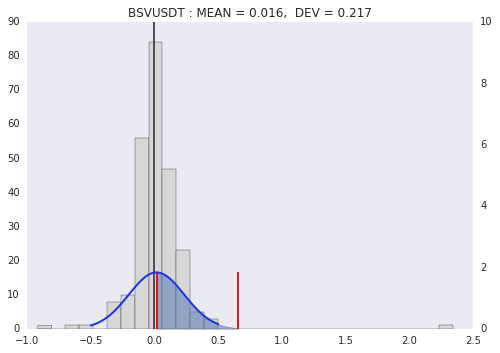

open:  352.6855 close:  362.1639 Delta:  9.4784
1 hour + prob =>  52.7954613011 %
1 hour k % =>  0.969720309783


In [270]:
for sym in symbols:
    checkNormal(sym, '1min', '240')

In [224]:
'''
url = 'https://api.binance.com/api/v3/klines?symbol=LTCBTC&interval=1m&limit=60'

[
  [
    1499040000000,      // Open time
    "0.01634790",       // Open
    "0.80000000",       // High
    "0.01575800",       // Low
    "0.01577100",       // Close
    "148976.11427815",  // Volume
    1499644799999,      // Close time
    "2434.19055334",    // Quote asset volume
    308,                // Number of trades
    "1756.87402397",    // Taker buy base asset volume
    "28.46694368",      // Taker buy quote asset volume
    "17928899.62484339" // Ignore.
  ]
]
'''
def checkNormalBin(symbol, period, size):
    url = 'https://api.binance.com/api/v3/klines?symbol='+symbol+'&interval=1m&limit=60'
    response = requests.get(url)
    data = response.json()

    delta = [(float(x[4]) - float(x[1]))/float(x[4])*100 for x in data]

    nDelta = np.array(delta)

    mu, std = norm.fit(nDelta)

    fig, ax1 = plt.subplots()
    ax1.grid(False)
    ax2 = ax1.twinx()
    ax2.grid(False)

    ax1.hist(nDelta, color='#d7d7d7')


    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(-.5, .5)
    p = norm.pdf(x, mu, std)
    ax2.plot(x, p, 'k', linewidth=2, c='#1E35E6')
    title = symbol + " Fit results: mu = %.3f,  std = %.3f" % (mu, std)
    plt.title(title)

    plt.vlines(0, 0, 10, colors='#3c3c3c')
    plt.vlines(mu, 0, norm.pdf(mu, mu, std), colors='#d90000')
    plt.vlines(3*std, 0, norm.pdf(mu, mu, std), colors='#d90000')
    
    plt.fill_between(np.linspace(mu, 3*std),norm.pdf(np.linspace(mu, 3*std), mu, std), alpha=0.5)
    
    plt.show()
    
    print 'open', data[len(data)-1][1]
    print 'close', data[0][4]
    print (norm.cdf(3*std, mu, std) - norm.cdf(0, mu, std))*100
    print mu * 60

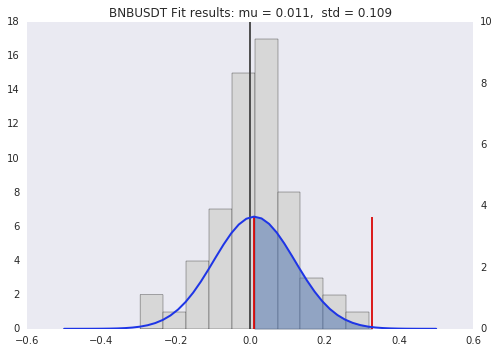

open 24.96170000
close 24.81200000
53.8476517462
0.663508518551


In [234]:
checkNormalBin('BNBUSDT', 2, 3)

In [290]:
data = [1,2,3]

In [293]:
data[0:3]

[1, 2, 3]